In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os

num_classes = 20
img_rows, img_cols = 32, 32
batch_size = 16

train_data_dir = 'simpsons_dataset/'
validation_data_dir = 'simpson_testset/'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Using TensorFlow backend.


Found 19241 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [2]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding = "same", input_shape = (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation("softmax"))

print(model.summary())

W0710 07:29:53.501300 139656386758400 deprecation_wrapper.py:119] From /home/dragneel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0710 07:29:53.524560 139656386758400 deprecation_wrapper.py:119] From /home/dragneel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0710 07:29:53.527148 139656386758400 deprecation_wrapper.py:119] From /home/dragneel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0710 07:29:53.572451 139656386758400 deprecation_wrapper.py:119] From /home/dragneel/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_de

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
__________

In [3]:
%matplotlib inline
import keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [4]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.00001)

callbacks = [earlystop, reduce_lr]

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])

nb_train_samples = 19241
nb_validation_samples = 990
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

W0710 07:30:03.322098 139656386758400 deprecation_wrapper.py:119] From /home/dragneel/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0710 07:30:03.438306 139656386758400 deprecation.py:323] From /home/dragneel/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
1202/1202 [==============================] - 407s 338ms/step - loss: 2.8450 - acc: 0.1573 - val_loss: 2.7958 - val_acc: 0.2172
Epoch 2/10
1202/1202 [==============================] - 423s 352ms/step - loss: 2.2727 - acc: 0.2892 - val_loss: 2.5045 - val_acc: 0.3234
Epoch 3/10
1202/1202 [==============================] - 408s 340ms/step - loss: 1.9139 - acc: 0.4076 - val_loss: 2.0227 - val_acc: 0.4805
Epoch 4/10
1202/1202 [==============================] - 397s 330ms/step - loss: 1.6337 - acc: 0.5033 - val_loss: 1.7503 - val_acc: 0.5503
Epoch 5/10
1202/1202 [==============================] - 404s 336ms/step - loss: 1.4388 - acc: 0.5739 - val_loss: 1.7461 - val_acc: 0.6057
Epoch 6/10
1202/1202 [==============================] - 377s 314ms/step - loss: 1.4226 - acc: 0.5804 - val_loss: 1.4805 - val_acc: 0.6622
Epoch 7/10
1202/1202 [==============================] - 378s 315ms/step - loss: 1.1988 - acc: 0.6530 - val_loss: 1.5846 - val_acc: 0.6509
Epoch 8/10
1202/1202 [============

In [5]:
%%time
model_score = model.evaluate_generator(validation_generator,steps=20)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

Model Test Loss: 1.0340795516967773
Model Test Accuracy: 0.81875
CPU times: user 5.95 s, sys: 48.5 ms, total: 6 s
Wall time: 1.62 s


Found 990 images belonging to 20 classes.
Confusion Matrix
[[37  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  1  0  2  0  0  0  0  1  2  0  0  0  0  0  0]
 [ 0  1  0 40  0  0  0  4  0  0  0  0  0  0  0  1  0  0  0  2]
 [ 0  0  0  0 48  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  1  4 33  0  2  0  2  0  0  1  1  1  1  0  2  0  1]
 [ 2  1  0  0  0  0 42  1  0  1  0  1  1  0  0  0  1  0  0  0]
 [ 2  0  0  0  0  0  0 45  0  0  0  0  0  0  1  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  2 43  0  0  2  0  0  0  3  0  0  0  0]
 [ 0  1  0  1  0  0  0  0  0 48  0  0  0  0  0  0  0  0  0  0]
 [ 6  0  3  5  0  0  0 31  0  1  0  0  0  0  0  2  2  0  0  0]
 [ 1  0 10  1  1  0  0  3  0  0  0 30  0  0  3  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  1  0  0  0  0 46  0  2  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  1  1  0  0  0  0 38  0  7  0  0  0  1]
 [ 0  1  0  0  0  0  0  1  0  0  0  0  0  0 47  0  0  0  0 

/home/dragneel/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


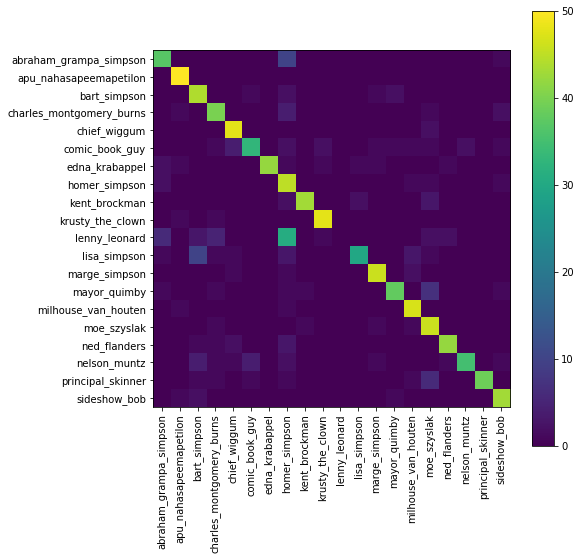

In [6]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 19241
nb_validation_samples = 990

Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)